In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("~/Downloads/equaldex_equality_index.csv")

In [8]:
df.head()

Rank Region ID  Name   EI  EI Legal  EI PO
0   IS   Iceland    94   98      90.0      1
1   NO    Norway    87   87      87.0      2
2   ES     Spain    83  100      67.0      3
3   UY   Uruguay    83   93      73.0      4
4   CL     Chile    81  100      62.0      5

In [10]:
df.dtypes

Rank          object
Region ID     object
Name           int64
EI             int64
EI Legal     float64
EI PO          int64
dtype: object

In [12]:
# Data Exploring and Data Manipulaiton

In [14]:
#!pip install pycountry-convert

In [16]:
import pycountry_convert as pc

def get_continent(alpha2):
    try:
        alpha2 = alpha2.strip().upper()
        continent_code = pc.country_alpha2_to_continent_code(alpha2)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return "Unknown"

df['Continent'] = df['Rank'].apply(get_continent)


In [18]:
df.loc[df['Rank'] == 'RU', 'Continent'] = 'Asia'

In [20]:
def categorize_ei(ei):
    if ei >= 80:
        return 'High'
    elif 50 <= ei < 80:
        return 'Medium'
    else:
        return 'Low'

df['EI Category'] = df['EI'].apply(categorize_ei)


In [22]:
continent_avg_ei = df.groupby('Continent')['EI'].mean()
print(continent_avg_ei)

Continent
Africa           25.283019
Asia             33.326531
Europe           74.767442
North America    50.217391
Oceania          44.285714
South America    73.916667
Unknown          43.666667
Name: EI, dtype: float64


In [24]:
continent_ei_counts = df.groupby(['Continent', 'EI Category']).size().unstack(fill_value=0)

# Display the table
print(continent_ei_counts)

EI Category    High  Low  Medium
Continent                       
Africa            1   46       6
Asia              1   37      11
Europe           20    1      22
North America     5   16       2
Oceania           2    9       3
South America     7    3       2
Unknown           0    3       0


In [26]:
df.head()

Rank Region ID  Name   EI  EI Legal  EI PO      Continent EI Category
0   IS   Iceland    94   98      90.0      1         Europe        High
1   NO    Norway    87   87      87.0      2         Europe        High
2   ES     Spain    83  100      67.0      3         Europe        High
3   UY   Uruguay    83   93      73.0      4  South America        High
4   CL     Chile    81  100      62.0      5  South America        High

In [28]:
df.describe(include="all")

Rank Region ID        Name          EI    EI Legal       EI PO  \
count   196       197  197.000000  197.000000  175.000000  197.000000   
unique  196       197         NaN         NaN         NaN         NaN   
top      IS   Iceland         NaN         NaN         NaN         NaN   
freq      1         1         NaN         NaN         NaN         NaN   
mean    NaN       NaN   39.812183   45.588832   34.862857   99.000000   
std     NaN       NaN   23.235490   28.406102   21.110915   57.013156   
min     NaN       NaN    1.000000    0.000000    2.000000    1.000000   
25%     NaN       NaN   20.000000   22.000000   16.000000   50.000000   
50%     NaN       NaN   37.000000   46.000000   33.000000   99.000000   
75%     NaN       NaN   57.000000   63.000000   53.000000  148.000000   
max     NaN       NaN   94.000000  100.000000   90.000000  197.000000   

       Continent EI Category  
count        197         197  
unique         7           3  
top       Africa         Low  
freq          53         115  
mean         NaN         NaN  
std          NaN         NaN  
min          NaN         NaN  
25%          NaN         NaN  
50%          NaN         NaN  
75%          NaN         NaN  
max          NaN         NaN

In [30]:
import plotly.express as px
#!pip  install pycountry
import pycountry

# Sample data setup (replace this with your actual dataframe)
# dataframe = pd.read_csv("your_path_here.csv")  # if you're importing

# Step 1: Convert ISO-2 to ISO-3 using pycountry
def iso2_to_iso3(iso2):
    try:
        return pycountry.countries.get(alpha_2=iso2).alpha_3
    except:
        return None

# Step 2: Create a new column with ISO-3 codes
df['ISO3'] = df['Rank'].apply(iso2_to_iso3)

# OPTIONAL: Print any failed matches
print("Missing codes:\n", df[df['ISO3'].isnull()]['Rank'])


Missing codes:
 76     XK
83    NaN
Name: Rank, dtype: object


In [33]:
# Create subsets by continent
df_africa = df[df["Continent"] == "Africa"]
df_asia = df[df["Continent"] == "Asia"]
df_europe = df[df["Continent"] == "Europe"]
df_north_america = df[df["Continent"] == "North America"]
df_south_america = df[df["Continent"] == "South America"]
df_oceania = df[df["Continent"] == "Oceania"]

In [35]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

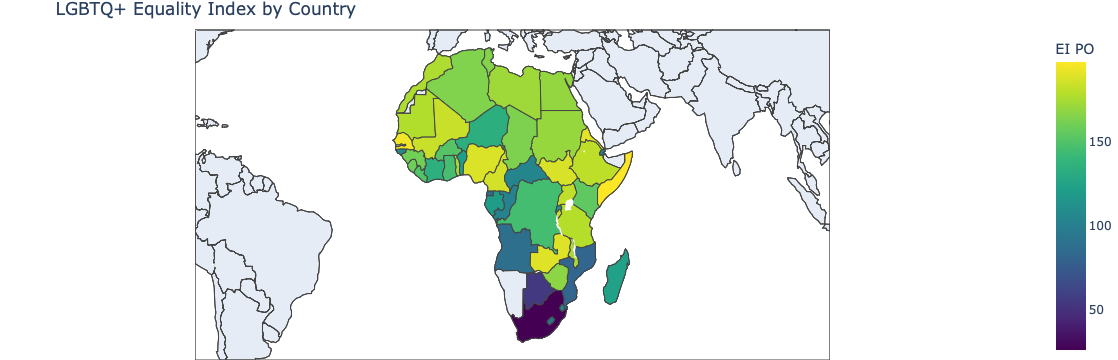

In [37]:
import plotly.express as px

fig = px.choropleth(
    df_africa,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

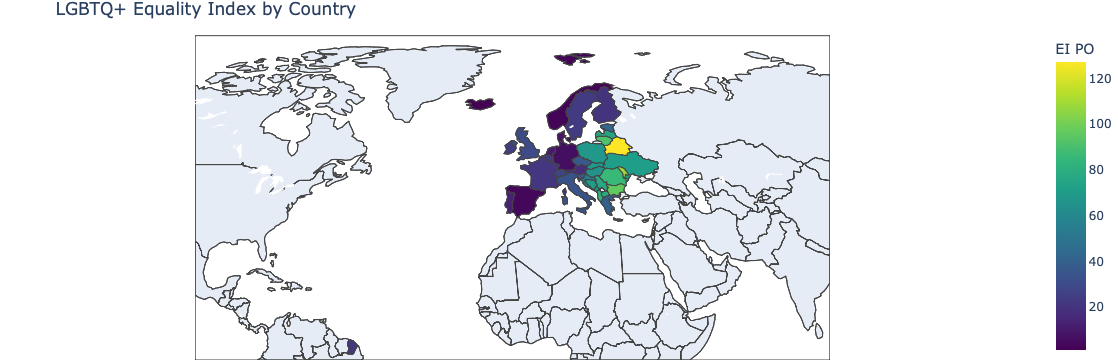

In [38]:
import plotly.express as px

fig = px.choropleth(
    df_europe,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

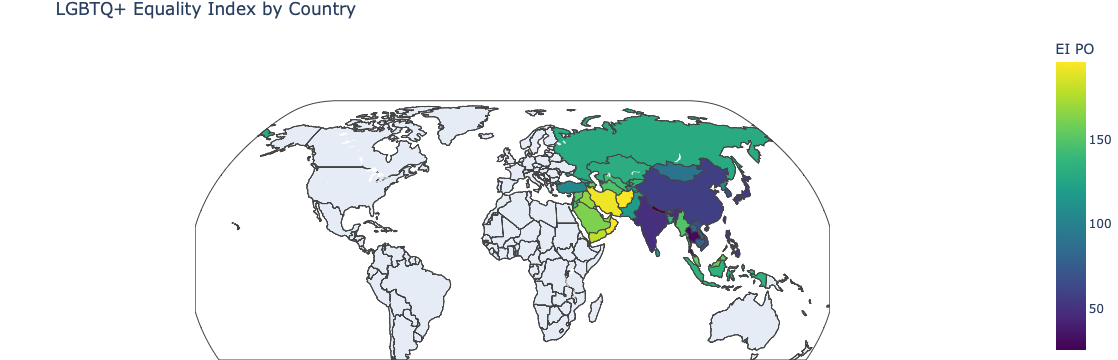

In [40]:
import plotly.express as px

fig = px.choropleth(
    df_asia,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

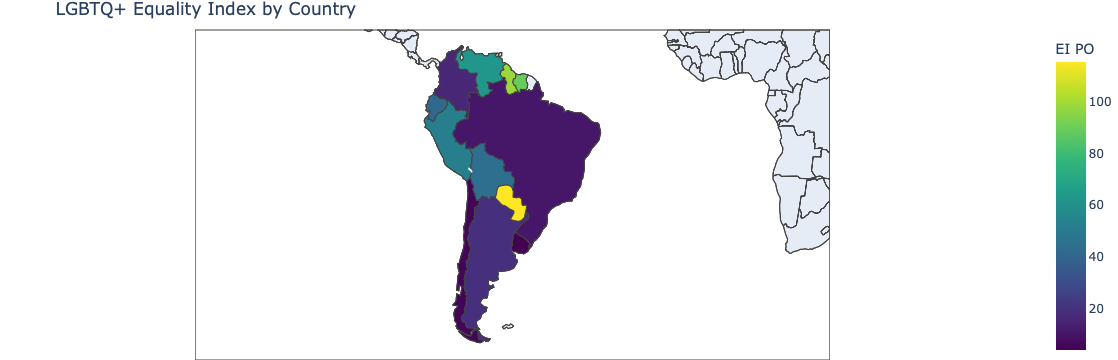

In [42]:
import plotly.express as px

fig = px.choropleth(
    df_south_america,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

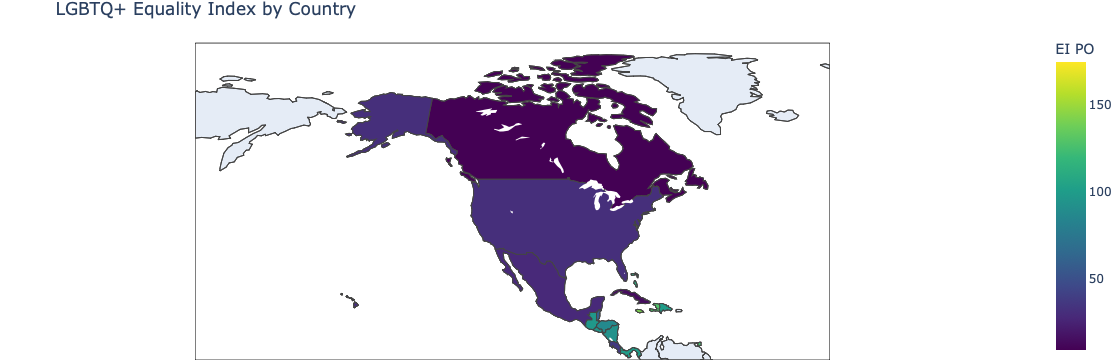

In [44]:
import plotly.express as px

fig = px.choropleth(
    df_north_america,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

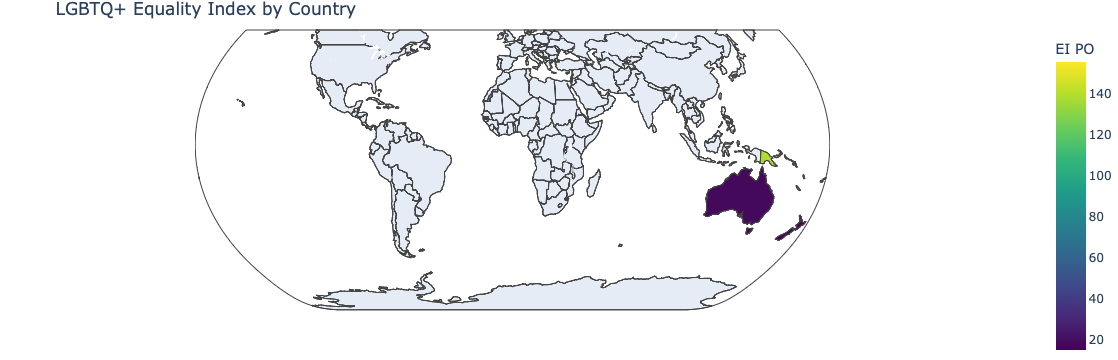

In [46]:
import plotly.express as px

fig = px.choropleth(
    df_oceania,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()

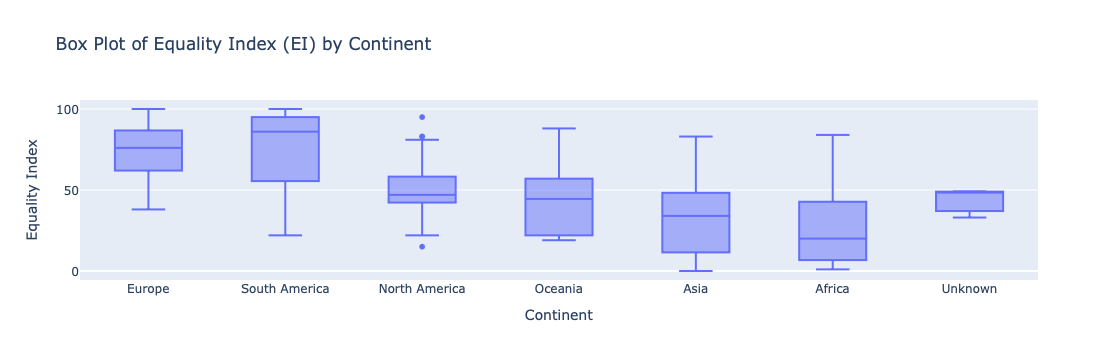

In [48]:
import plotly.express as px

fig = px.box(
    df,
    x='Continent',  # Group by continent
    y='EI',  # The Equality Index
    title="Box Plot of Equality Index (EI) by Continent",
    labels={"EI": "Equality Index", "Continent": "Continent"},  # Optional, for better labeling
)

fig.show()


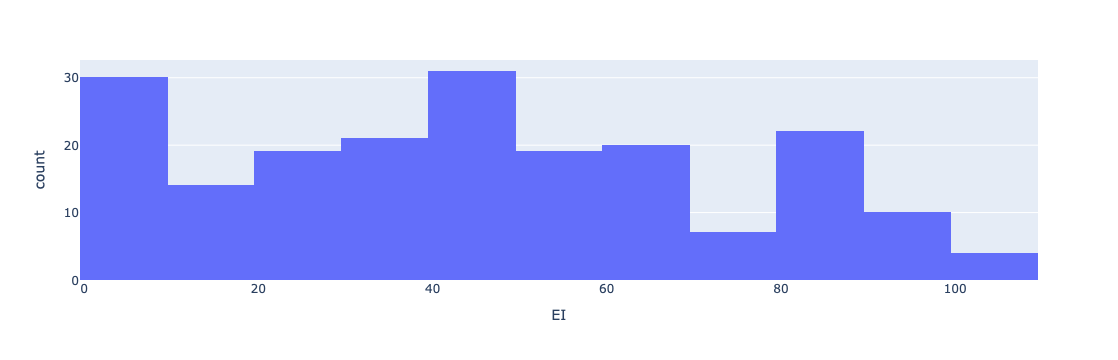

In [51]:
fig = px.histogram(
    df,
    x='EI',
)
fig.show()

In [53]:
# List of 10 countries to keep
countries_to_keep = ['Somalia', 'Afghanistan', 'Uruguay', 'Chile', 'Iceland', 'Norway', 'Oman', 'Senegal', 'Spain', 'Cape Verde']

# Filter the DataFrame
df_subset = df[df['Region ID'].isin(countries_to_keep)]


In [63]:
df_subset.head(15)

Rank    Region ID  Name   EI  EI Legal  EI PO      Continent EI Category  \
0     IS      Iceland    94   98      90.0      1         Europe        High   
1     NO       Norway    87   87      87.0      2         Europe        High   
2     ES        Spain    83  100      67.0      3         Europe        High   
3     UY      Uruguay    83   93      73.0      4  South America        High   
4     CL        Chile    81  100      62.0      5  South America        High   
39    CV   Cape Verde    65   49      80.0     40         Africa         Low   
193   SN      Senegal     4    3       4.0    194         Africa         Low   
194   OM         Oman     3    3       NaN    195           Asia         Low   
195   AF  Afghanistan     1    1       2.0    196           Asia         Low   
196   SO      Somalia     1    1       NaN    197         Africa         Low   

    ISO3  
0    ISL  
1    NOR  
2    ESP  
3    URY  
4    CHL  
39   CPV  
193  SEN  
194  OMN  
195  AFG  
196  SOM

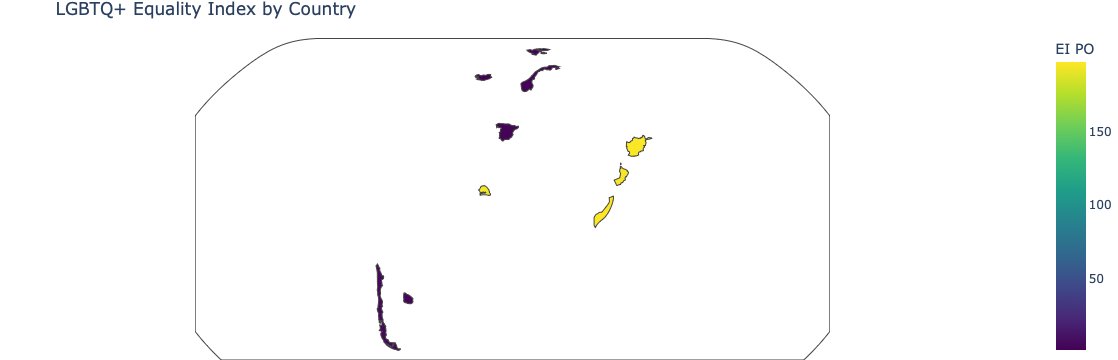

In [75]:
import plotly.express as px

fig = px.choropleth(
    df_subset,
    locations="ISO3",        # This should be ISO Alpha-2 codes
    locationmode="ISO-3",
    color="EI PO",                   # Color by Equality Index
    hover_name="Region ID",            # Show country name on hover
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="LGBTQ+ Equality Index by Country"
)

fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})

fig.show()